<a href="https://colab.research.google.com/github/samirasonfack/Kaggle-Competition-for-House-Pricing/blob/main/src/projet_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPROCESSING

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Charger le fichier en considérant "NA", "NaN" et "" comme NaN
df = pd.read_csv('train.csv', na_values=["NaN", ""])
# Strip spaces from column names
df.columns = df.columns.str.strip()


df.describe()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace("NA", pd.NA)
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')
median_year = df['GarageYrBlt'].median()
df['GarageYrBlt'].fillna(median_year, inplace=True)
print(df['GarageYrBlt'].isnull().sum())  # Vérifier qu'il n'y a plus de NaN
print(df[['GarageYrBlt']].sample(10))


0
      GarageYrBlt
979        1963.0
613        1980.0
677        1924.0
467        1942.0
281        2006.0
1262       1957.0
997        1970.0
104        1951.0
815        1998.0
1041       1966.0


<ipython-input-2-f670a08dfe35>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(median_year, inplace=True)


In [ ]:
# Convert MSSubClass from numeric to string
df['MSSubClass'] = df['MSSubClass'].astype(str)

# Check the updated column
print(df['MSSubClass'].head())



0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object


In [ ]:

# Trouver les colonnes avec des valeurs manquantes
colonnes = df.columns
# Nombre de lignes dans le dataframe
nombre_de_lignes = len(df)
colonnes_avec_valeurs_manquantes = {}
print("Nombre de lignes: ", nombre_de_lignes)
print("nomnre de colonnes: ", len(colonnes))
print("-----------------------------")
print("taux de valeurs manquantes par colonne:")
for colonne in colonnes:
    s = df[colonne].isna().sum()
    if s > 0:
        colonnes_avec_valeurs_manquantes[colonne] = round(s / nombre_de_lignes * 100, 2)
        print(colonne, ": ", colonnes_avec_valeurs_manquantes[colonne], "%")


Nombre de lignes:  1460
nomnre de colonnes:  81
-----------------------------
taux de valeurs manquantes par colonne:


In [ ]:
target = df['SalePrice']
num_attributes = df.select_dtypes(exclude='object').drop(['SalePrice', 'Id'], axis=1)


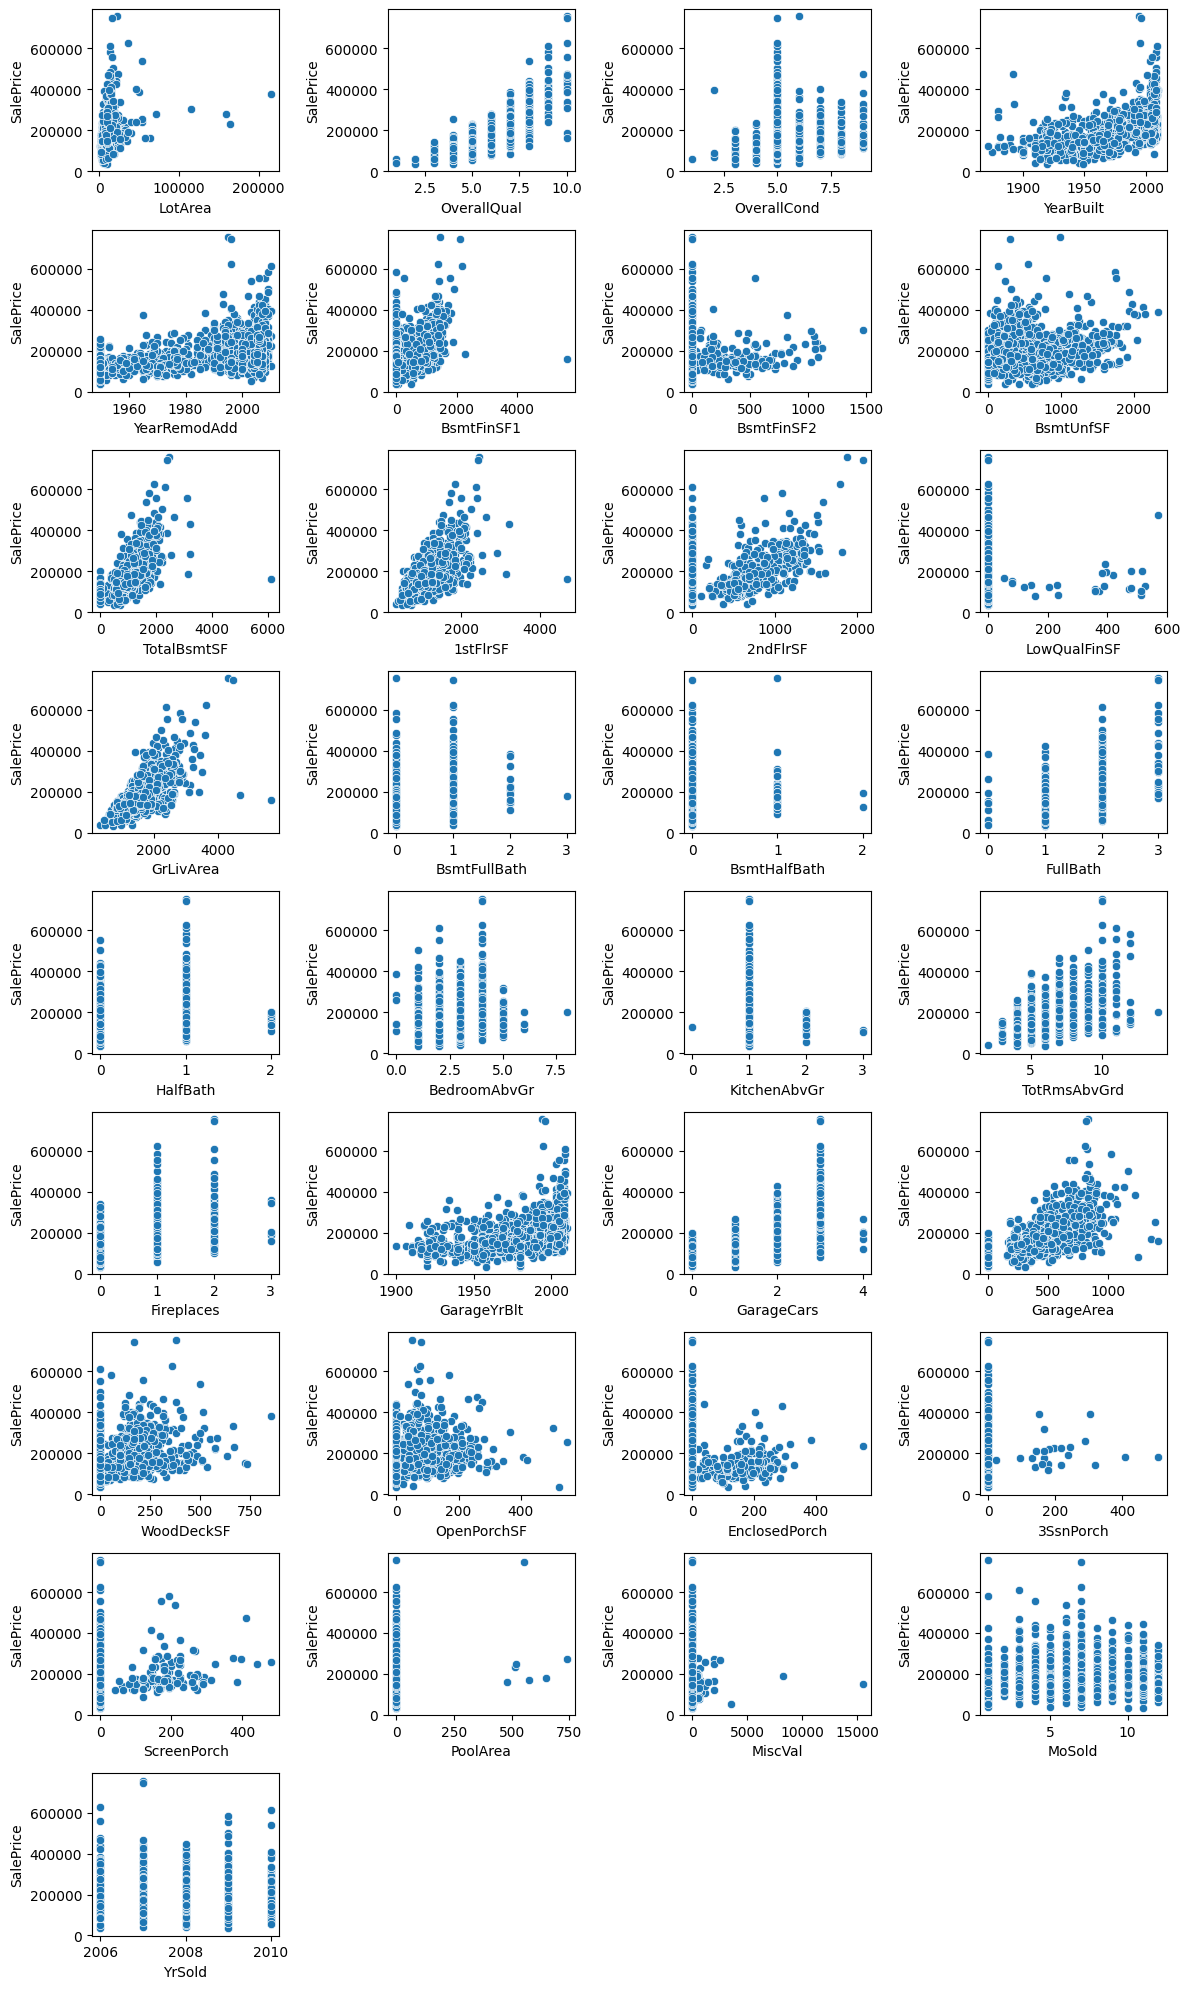

In [ ]:
f = plt.figure(figsize=(12,20))
for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(x=num_attributes.iloc[:, i], y=target)

plt.tight_layout()
plt.show()


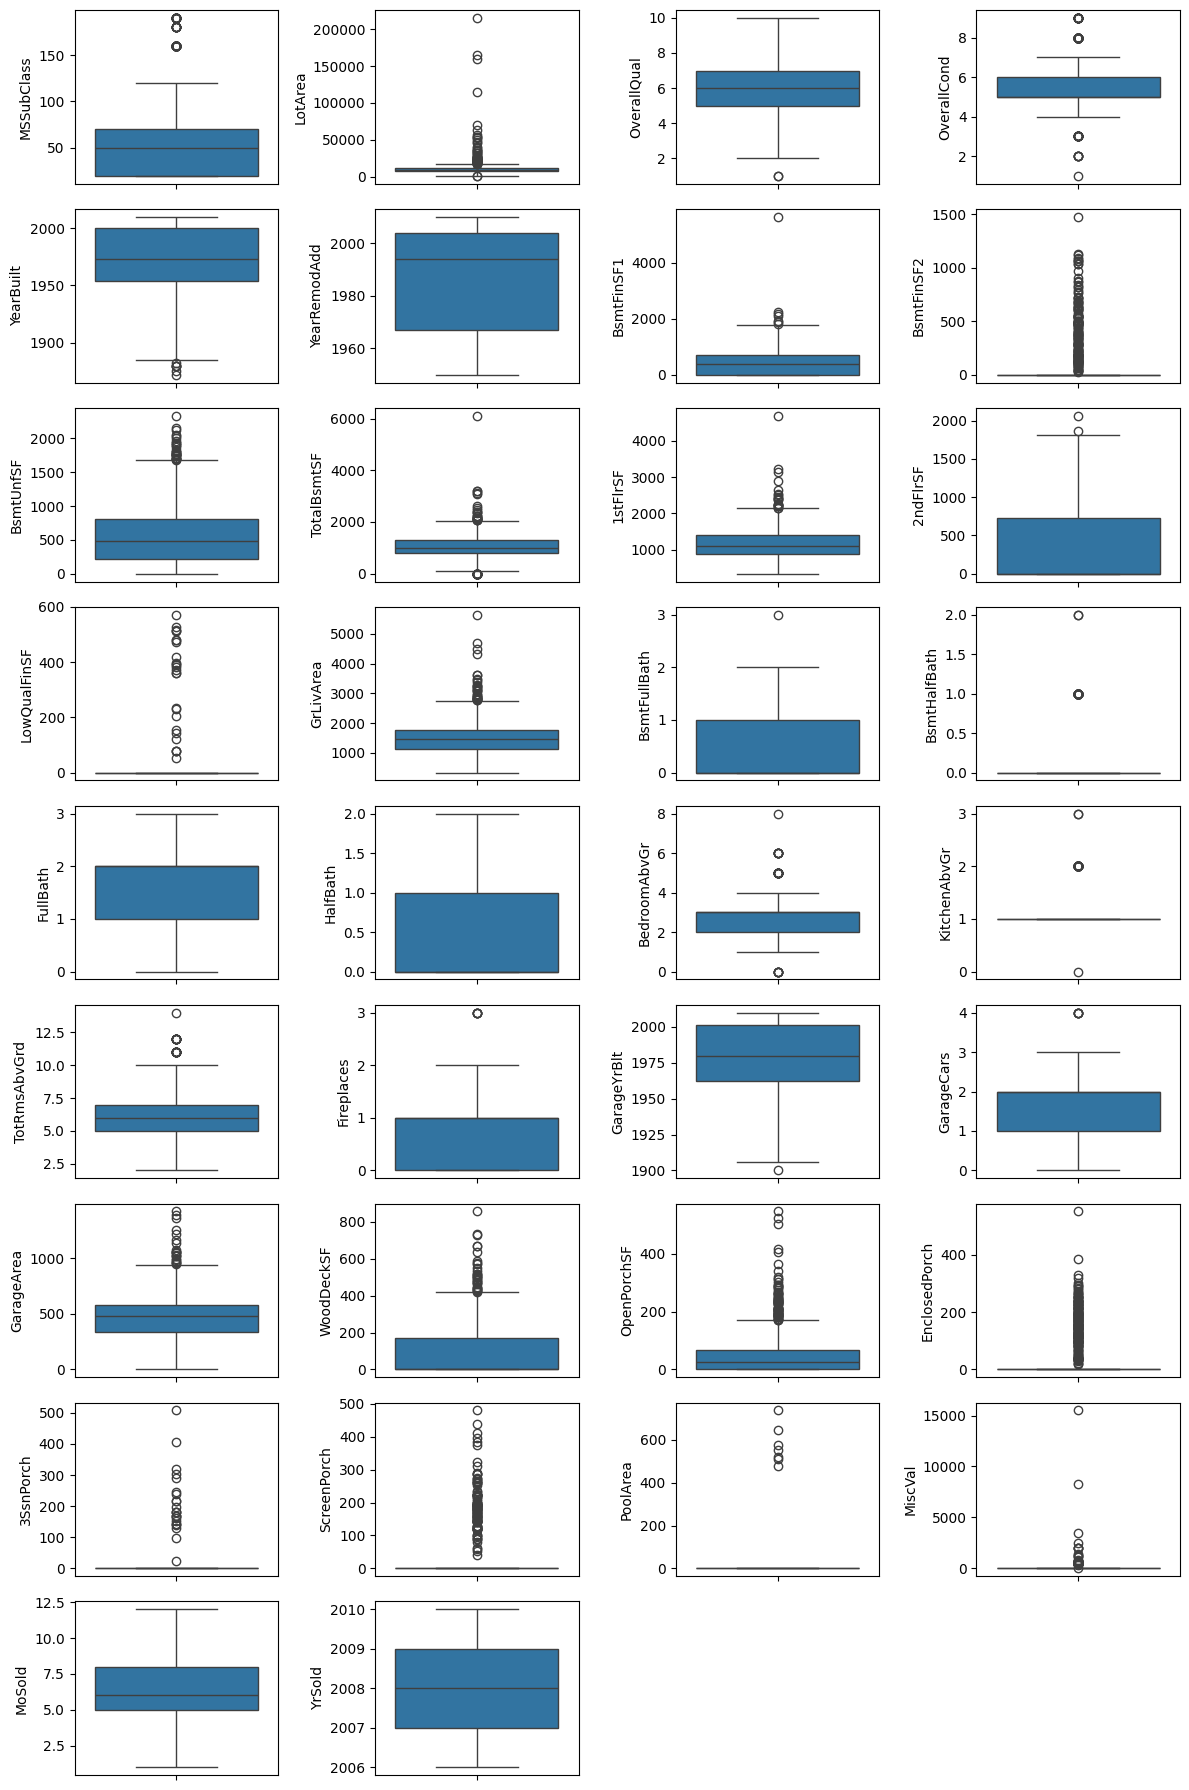

In [ ]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()


In [ ]:


# Calculate correlation of each numerical feature with the target 'SalePrice'
corr_with_target = num_attributes.corrwith(target)

# Sort the correlations in descending order
corr_with_target = corr_with_target.sort_values(ascending=False)

# Print the correlation of each numerical feature with 'SalePrice'
print("Correlation of each numerical feature with 'SalePrice':")
print(corr_with_target)




Correlation of each numerical feature with 'SalePrice':
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


In [ ]:
corr_matrix = num_attributes.corr()

In [ ]:

# 4. Identify highly correlated features (above a threshold, e.g., 0.9) with each other
threshold = 0.6
highly_corr_features = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
                        if i != j and abs(corr_matrix.loc[i, j]) > threshold]

print("\nHighly Correlated Features (Above 0.6):")
print(highly_corr_features)

df_cleaned = df.copy()
df_cleaned.columns = df_cleaned.columns.str.strip()
# 5. Remove one of the highly correlated features if needed
# Keep the feature with the highest correlation with 'SalePrice'
columns_to_drop = set()  # Keep track of columns to be dropped

for i, j in highly_corr_features:
    if i in columns_to_drop or j in columns_to_drop:
        continue  # Skip if either column is already marked for removal

    if corr_with_target[i] > corr_with_target[j]:
        columns_to_drop.add(j)  # Mark the feature with lower correlation for removal
    else:
        columns_to_drop.add(i)  # Mark the feature with lower correlation for removal

# Drop the marked columns outside the loop
df_cleaned = df_cleaned.drop(columns=list(columns_to_drop))



Highly Correlated Features (Above 0.6):
[('OverallQual', 'GarageCars'), ('BsmtFinSF1', 'BsmtFullBath'), ('TotalBsmtSF', '1stFlrSF'), ('1stFlrSF', 'TotalBsmtSF'), ('2ndFlrSF', 'GrLivArea'), ('2ndFlrSF', 'HalfBath'), ('2ndFlrSF', 'TotRmsAbvGrd'), ('GrLivArea', '2ndFlrSF'), ('GrLivArea', 'FullBath'), ('GrLivArea', 'TotRmsAbvGrd'), ('BsmtFullBath', 'BsmtFinSF1'), ('FullBath', 'GrLivArea'), ('HalfBath', '2ndFlrSF'), ('BedroomAbvGr', 'TotRmsAbvGrd'), ('TotRmsAbvGrd', '2ndFlrSF'), ('TotRmsAbvGrd', 'GrLivArea'), ('TotRmsAbvGrd', 'BedroomAbvGr'), ('GarageCars', 'OverallQual'), ('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars')]


In [ ]:
print(len(df_cleaned.columns.tolist()))
print(df_cleaned.columns.tolist())

75
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondi

#Traitement des variables Catégorielles

In [ ]:
cat_attributes = df_cleaned.select_dtypes(include='object')
print(cat_attributes.columns.tolist())
print(len(cat_attributes.columns.tolist()))


['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
34


In [ ]:
print(df_cleaned['GarageQual'])

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
1455    3.0
1456    3.0
1457    3.0
1458    3.0
1459    3.0
Name: GarageQual, Length: 1460, dtype: float64


34 données catégorielles dont 13 ordinales (score de passable à excellent) et 21 purement descriptives

In [ ]:
# List of known ordinal columns (to avoid checking manually)
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure', 'KitchenQual',
                    'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Dictionary of inferred mappings (sorted by assumed ranking)
ordinal_mappings = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Includes 'NA' as no basement
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex']
}

# Apply encoding dynamically
from sklearn.preprocessing import OrdinalEncoder

# Keep only the categories present in the data
filtered_mappings = [ordinal_mappings[col] for col in ordinal_features if col in df_cleaned.columns]

# Strip ALL spaces from categorical columns in df_cleaned before encoding
for col in ordinal_features:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace(" ", "") # Remove all spaces

# Apply OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=filtered_mappings)
df_cleaned[ordinal_features] = ordinal_encoder.fit_transform(df_cleaned[ordinal_features])

print("✅ Ordinal encoding applied dynamically without manual checking!")


✅ Ordinal encoding applied dynamically without manual checking!


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns that are NOT in the ordinal list
nominal_features = [col for col in df_cleaned.select_dtypes(include=['object']).columns if col not in ordinal_features]

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_cleaned[nominal_features]),
                          columns=onehot_encoder.get_feature_names_out(nominal_features))

# Merge with original dataframe
df_cleaned = df_cleaned.drop(columns=nominal_features)
df_cleaned = pd.concat([df_cleaned, df_encoded], axis=1)

print("✅ One-Hot Encoding completed for nominal features!")


✅ One-Hot Encoding completed for nominal features!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):

        self.ordinal_encoder = None  # Will be defined after fit()

        # Define ordinal features
        self.ordinal_features = [
            'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
            'BsmtExposure', 'KitchenQual', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
        ]

        # Mappings for ordinal encoding
        self.ordinal_mappings = {
            'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
            'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex']
        }

    def fit(self, X, y=None):
        return self

        # Add a transform method to apply the transformations
    def transform(self, X):
        # Create a copy of the input DataFrame to avoid modifying the original
        X_transformed = X.copy()

        # Apply strip to object columns
        for col in X_transformed.select_dtypes(include=['object']).columns:
            X_transformed[col] = X_transformed[col].str.strip()

        # Convert other columns to numeric
        for col in X_transformed.select_dtypes(exclude=['object']).columns:
            X_transformed[col] = pd.to_numeric(X_transformed[col], errors='coerce')

        return X_transformed


# Define preprocessing pipeline for the dataset
def preprocess_pipeline(df , feature_transformer):
    # Define the ordinal features and non-ordinal (nominal) features
    ordinal_features = [col for col in df.columns if col in FeatureTransformer().ordinal_features]
    nominal_features = [col for col in df.select_dtypes(include=['object']).columns if col not in ordinal_features]
    numerical_features = [col for col in df.select_dtypes(include=['number']).columns if col not in  ['SalePrice', 'Id']]

    # Handle missing values and encoding transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([


                ('ordinal_encoder', OrdinalEncoder(categories=[feature_transformer.ordinal_mappings[col]
                                                              for col in ordinal_features if col in X_train.columns],
                                                   handle_unknown='use_encoded_value', unknown_value=-1))
            ]), ordinal_features),

            ('nominal', Pipeline([

                ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
            ]), nominal_features),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()) # Impute missing numeric values
            ]), numerical_features)
        ]
    )

    return preprocessor




In [ ]:
from sklearn.model_selection import GridSearchCV

# Chargement des données
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

selected_columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
X_train = train[selected_columns[:-1]]  # Select columns for training data
X_test = test[selected_columns[:-1]] # Select columns for test data (excluding 'SalePrice')


# Séparation des features et de la cible
target = "SalePrice"
id_col = "Id"
X_train = X_train.drop(['Id'] , axis=1)
y_train = np.log(train[target])
X_test = test.drop(columns=[id_col])





In [ ]:
def clean(df):

  for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')


  ordinal_features = [
      'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
      'BsmtExposure', 'KitchenQual', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
  ]

  # Assume these are your nominal features (categorical, non-ordinal)
  nominal_features = [
      'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
      'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
      'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
      'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
      'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
      'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
  ]


  # Get the numeric columns by excluding ordinal and nominal features
  numeric_columns = [col for col in selected_columns
                    if col not in ordinal_features and col not in nominal_features and col not in ['Id','SalePrice']]

  for col in numeric_columns:
      df[col] = df[col].replace('NA', np.nan)
      df[col] = pd.to_numeric(df[col], errors='coerce')

  return df



In [ ]:
X_train_cleaned = clean(X_train)
X_test_cleaned = clean(X_test)
# Apply FeatureTransformer to clean the data first
feature_transformer = FeatureTransformer()
X_train_cleaned = feature_transformer.transform(X_train_cleaned)
X_test_cleaned = feature_transformer.transform(X_test_cleaned)

# Create the preprocessor pipeline using the cleaned data
preprocessor = preprocess_pipeline(X_train_cleaned , feature_transformer)

# Apply the pipeline to transform the data
X_train_transformed = preprocessor.fit_transform(X_train_cleaned)
X_test_transformed = preprocessor.transform(X_test_cleaned)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 22, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

# Define the SVR model
svr_model = SVR()

# Define the parameter grid for tuning
param_grid = {
    'svm__C': [ 10, 1],  # Regularization parameter
    'svm__kernel': ['rbf' , 'linear'],  # Kernel types
    'svm__epsilon': [ 0.2],  # Epsilon parameter
    'svm__gamma': ['scale'],  # Kernel coefficient (for 'rbf', 'poly')
}

# Create the full pipeline with the SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", svr_model)
])

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)



Best parameters: {'svm__C': 1, 'svm__epsilon': 0.2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 22, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Save predictions
submission = pd.DataFrame({id_col: test[id_col], target: np.exp(y_pred)})
submission.to_csv("submission.csv", index=False)

print("✅ Préprocessing + entraînement SVM avec GridSearchCV terminé. Fichier 'submission.csv' généré !")

# Evaluate performance on training data
y_train_pred = best_model.predict(X_train)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training data: {rmse:.4f}")

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_train, y_train_pred)
print(f"R² on training data: {r2:.4f}")

✅ Préprocessing + entraînement SVM avec GridSearchCV terminé. Fichier 'submission.csv' généré !
RMSE on training data: 0.1153
R² on training data: 0.9166


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

param_grid = {
    'random_forest__n_estimators': [1000],
    'random_forest__max_depth': [10,20],
    'random_forest__min_samples_split': [2, 5],
    'random_forest__max_features': ['sqrt']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")



Best Parameters: {'random_forest__max_depth': 20, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 1000}


In [ ]:
y_pred = np.exp(best_model_rf.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 15, 16, 22, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Save predictions
submission_rf = pd.DataFrame({id_col: test[id_col], target: y_pred})
submission_rf.to_csv("submission_rf.csv", index=False)

print("✅ Préprocessing + entraînement Random Forest avec GridSearchCV terminé. Fichier 'submission.csv' généré !")

# Evaluate performance on training data
y_train_pred = best_model_rf.predict(X_train)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training data: {rmse:.4f}")

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_train, y_train_pred)
print(f"R² on training data: {r2:.4f}")

✅ Préprocessing + entraînement Random Forest avec GridSearchCV terminé. Fichier 'submission.csv' généré !
RMSE on training data: 0.0538
R² on training data: 0.9819
